In [45]:
import piplite
await piplite.install('seaborn')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris

In [46]:
test_df = pd.read_csv('test.csv')
train_df = pd.read_csv('train.csv')

In [47]:
test_df.corr()

<ipython-input-47-45847b2d573f>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  test_df.corr()


,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.026751,-0.034102,0.003818,0.043080,0.008211
Pclass,-0.026751,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,-0.577147,0.337932,0.171539,0.230046,1.000000


In [48]:
train_df.corr()

<ipython-input-48-a7a80d20a44e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  train_df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


<ipython-input-49-e39f3140fab1>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(test_df.corr())
<ipython-input-49-e39f3140fab1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(test_df.corr(), annot=True, mask=mask)


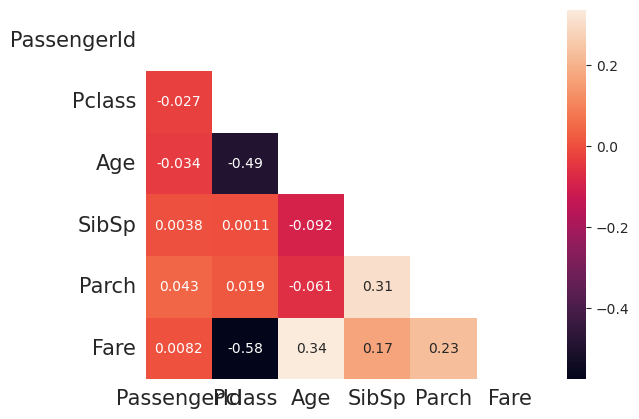

In [49]:
mask = np.triu(test_df.corr())
sns.heatmap(test_df.corr(), annot=True, mask=mask)
sns.set_style('white')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

<ipython-input-50-ae4857d5a231>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  mask = np.triu(train_df.corr())
<ipython-input-50-ae4857d5a231>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(train_df.corr(), annot=True, mask=mask)


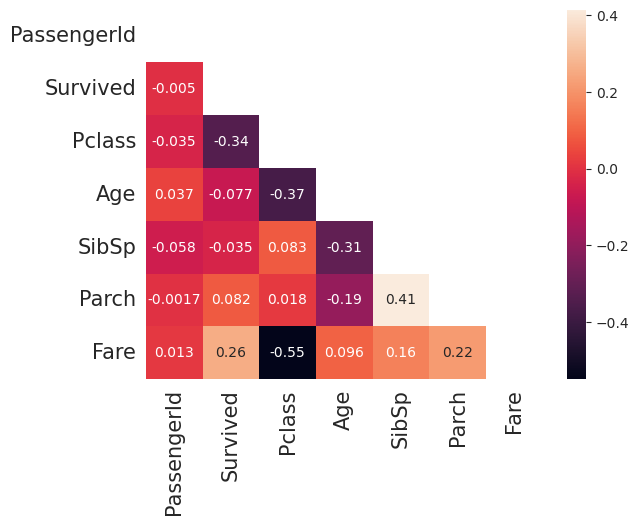

In [50]:
mask = np.triu(train_df.corr())
sns.heatmap(train_df.corr(), annot=True, mask=mask)
sns.set_style('white')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [51]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [52]:
df = train_df.drop(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked', 'Survived', 'Age', 'Fare'], axis=1)
X = df
y = train_df['Survived']
df

,PassengerId,Pclass,SibSp,Parch
0,1,3,1,0
1,2,1,1,0
2,3,3,0,0
3,4,1,1,0
4,5,3,0,0
...,...,...,...,...
886,887,2,0,0
887,888,1,0,0
888,889,3,1,2
889,890,1,0,0


In [53]:
log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

In [54]:
log_reg.score(X, y)

0.6902356902356902

In [55]:
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X, y)
print(clf.score(X, y))

0.6711560044893379


[Text(0.5, 0.8333333333333334, 'x[1] <= 2.5\ngini = 0.473\nsamples = 891\nvalue = [549, 342]'),
 Text(0.25, 0.5, 'x[3] <= 0.5\ngini = 0.493\nsamples = 400\nvalue = [177, 223]'),
 Text(0.125, 0.16666666666666666, 'gini = 0.5\nsamples = 297\nvalue = [150, 147]'),
 Text(0.375, 0.16666666666666666, 'gini = 0.387\nsamples = 103\nvalue = [27, 76]'),
 Text(0.75, 0.5, 'x[0] <= 401.5\ngini = 0.367\nsamples = 491\nvalue = [372, 119]'),
 Text(0.625, 0.16666666666666666, 'gini = 0.422\nsamples = 225\nvalue = [157, 68]'),
 Text(0.875, 0.16666666666666666, 'gini = 0.31\nsamples = 266\nvalue = [215, 51]')]

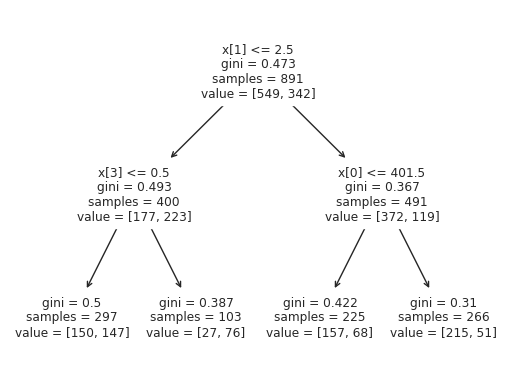

In [56]:
tree.plot_tree(clf)